<a href="https://colab.research.google.com/github/Ikunalk4/LGMVIP-DATASCIENCE/blob/main/Task_2_Stock_market_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn import linear_model

In [3]:
stock_df = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')

In [4]:
stock_df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [5]:
stock_df.shape

(2035, 8)

In [6]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [7]:
stock_df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [8]:
stock_df.isna().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
stock_df['Open'].describe()

count    2035.000000
mean      149.713735
std        48.664509
min        81.100000
25%       120.025000
50%       141.500000
75%       157.175000
max       327.700000
Name: Open, dtype: float64

In [10]:
stock_df['Close'].describe()

count    2035.00000
mean      149.45027
std        48.71204
min        80.95000
25%       120.05000
50%       141.25000
75%       156.90000
max       325.75000
Name: Close, dtype: float64

In [18]:
stock_df['Total Trade Quantity'].describe()

count    2.035000e+03
mean     2.335681e+06
std      2.091778e+06
min      3.961000e+04
25%      1.146444e+06
50%      1.783456e+06
75%      2.813594e+06
max      2.919102e+07
Name: Total Trade Quantity, dtype: float64

In [45]:
stock_df['Turnover (Lacs)'].describe()

count     2035.000000
mean      3899.980565
std       4570.767877
min         37.040000
25%       1427.460000
50%       2512.030000
75%       4539.015000
max      55755.080000
Name: Turnover (Lacs), dtype: float64

In [47]:
fig = px.histogram(stock_df,x='Turnover (Lacs)',marginal='box',nbins=100, title='Distribution of Turnover (Lacs)')
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(stock_df,x='Open',marginal='box',nbins=247, title='Distribution of stock opening price')
fig.update_layout(bargap=0.1)
fig.show()

In [12]:
fig = px.histogram(stock_df,x='Close',marginal='box',color_discrete_sequence=['red'], nbins=245, title='Distribution of stock closing price')
fig.update_layout(bargap=0.1)
fig.show()

In [22]:
fig = px.histogram(stock_df,x='Total Trade Quantity',marginal='box',color_discrete_sequence=['black'], nbins=100, title='Distribution of Total Trade Quantity')
fig.update_layout(bargap=0.1)
fig.show()

In [16]:
fig = px.scatter(stock_df, 
                 x='Open', 
                 y='Turnover (Lacs)', 
                 opacity=0.8, 
                 title='Open vs. Closing price')
fig.update_traces(marker_size=5)
fig.show()

In [17]:
fig = px.scatter(stock_df, 
                 x='Total Trade Quantity', 
                 y='Turnover (Lacs)', 
                 opacity=0.8, 
                 title='Open vs. Closing price')
fig.update_traces(marker_size=5)
fig.show()

In [14]:
stock_df.corr()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

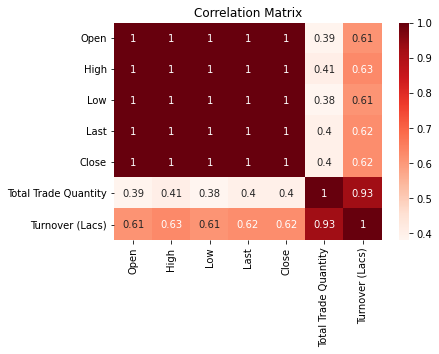

In [15]:
sns.heatmap(stock_df.corr(), cmap='Reds', annot =True)
plt.title('Correlation Matrix')

In [24]:
model = linear_model.LinearRegression()

In [32]:
x = stock_df.drop(['Close','Date'], axis='columns')
y = stock_df['Close']

In [33]:
x.head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,234.05,235.95,230.20,233.50,3069914,7162.35
1,234.55,236.80,231.10,233.80,5082859,11859.95
2,240.00,240.00,232.50,235.00,2240909,5248.60
3,233.30,236.75,232.00,236.25,2349368,5503.90
4,233.55,239.20,230.75,234.00,3423509,7999.55


In [34]:
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [35]:
prediction = model.predict(x)

In [43]:
prediction

array([233.3212029 , 233.69988647, 234.85344394, ..., 120.37014385,
       120.82591834, 121.18290563])

In [37]:
model.coef_

array([-6.75668189e-02,  9.74230063e-02,  9.60653097e-02,  8.74013427e-01,
        1.39532179e-09, -4.64366546e-06])

In [38]:
model.intercept_

-0.01913484631174356

In [40]:
model.score(x,y)

0.9999338126402353